# Examples for pyoculus
## 1. Import oculus and the solvers

In [ ]:
import numpy as np
from pyoculus.problems import TwoWaves
from pyoculus.solvers import (PoincarePlot, FixedPoint, 
                              LyapunovExponent, FluxSurfaceGR)

## 2. Set up the problem we want to compute.
This can be a SPEC equilibrium or anything. Here as an example, we use the perturbed slab model Stuart uses for his "Destruction" paper

In [2]:
ps = pyoculus.problems.TwoWaves(k=0.0018)

## 3. Poincare Plot

CPU times: user 7.46 s, sys: 67.6 ms, total: 7.52 s
Wall time: 7.7 s


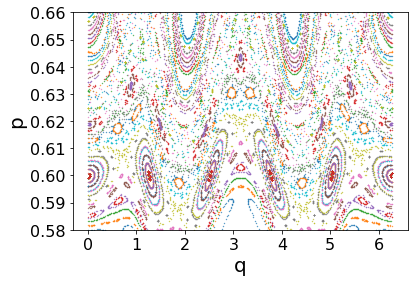

In [3]:
%%time
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-9

# set up the Poincare plot
pparams = dict()
pparams['Nfp'] = 1
pparams['sbegin'] = 0.58
pparams['send'] = 0.66
pparams['nPtrj'] = 50
pparams['nPpts'] = 500
pparams['zeta'] =0.0

pplot = PoincarePlot(ps,pparams,integrator_params=iparams)
pdata=pplot.compute()
pplot.plot(ylim=[0.58,0.66],s=0.5)

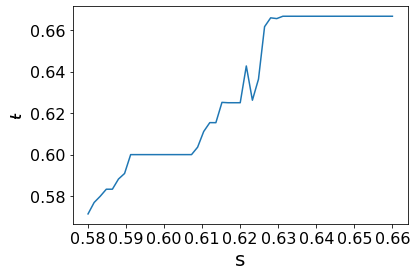

In [4]:
pplot.compute_iota()
pplot.plot_iota()

## 4. Finding fixed points and plot them

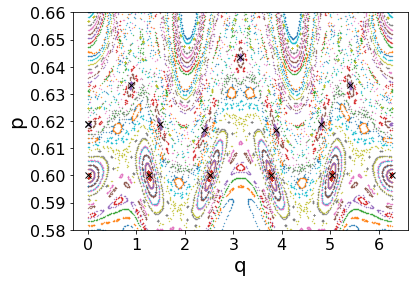

In [5]:
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-10

pparams = dict()
pparams['Nfp'] = 1
pparams['theta'] = 0

fp58 = FixedPoint(ps,pparams,integrator_params=iparams)
fp35 = FixedPoint(ps,pparams,integrator_params=iparams)

result58=fp58.compute(guess=[5/8,0],pp=5,qq=8,sbegin=0.5,send=0.7)
result35=fp35.compute(guess=[3/5,0],pp=3,qq=5,sbegin=0.5,send=0.7)

pplot.plot(ylim=[0.58,0.66],s=0.5)
fp35.plot()
fp58.plot()

## 5. Greene's Residue and finding flux surfaces

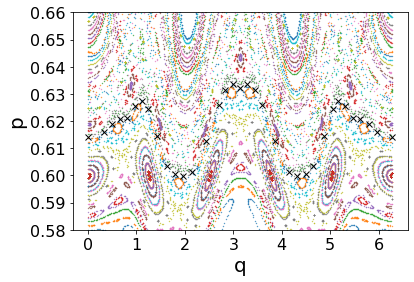

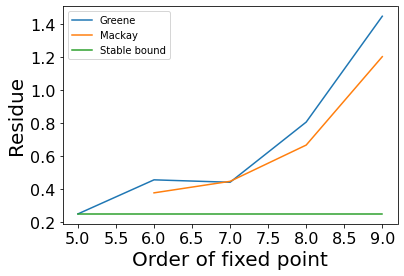

In [8]:
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-10

pparams = dict()
pparams['Nfp'] = 1
pparams['theta'] = 0

flux_surface = FluxSurfaceGR(ps,pparams,integrator_params=iparams)
iota = 1/((np.sqrt(5) + 1) / 2)
fsresult = flux_surface.compute(iota, n_expand=9, fixed_point_left=fp35, fixed_point_right=fp58)
pplot.plot(ylim=[0.58,0.66],s=0.5)
flux_surface.plot()
flux_surface.plot_residue()

## 6. Compute the Lyapunov Exponent

In [9]:
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-10

pparams = dict()
pparams['Nfp'] = 1
pparams['nPpts'] = 4000

le = LyapunovExponent(ps,pparams,integrator_params=iparams)

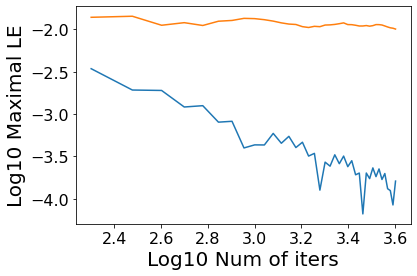

In [10]:
le_result=le.compute(0,[result58.s[0],result58.y[0]])
le.plot()
le_result=le.compute(0,[0.63,0])
le.plot()

## 7. QFM

In [8]:
qfm = pyoculus.solvers.QFM(ps, {"pqNtor":8, "pqMpol":24, "nfft_multiplier":2})

plist = np.array([5,13, 8,11,3])
qlist = np.array([8,21,13,18,5])
sguess= np.ones(qlist.size) * 0.6
surfaces = qfm.construct_qfms(plist,qlist, sguesslist=sguess, bounding_surfaces=None)

1/5 completed.
2/5 completed.
3/5 completed.
4/5 completed.
5/5 completed.


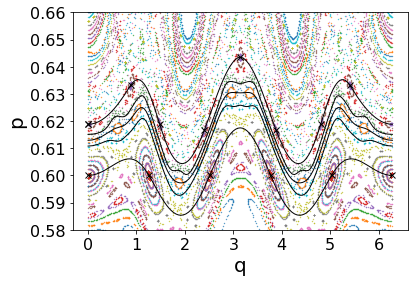

In [9]:
pplot.plot(ylim=[0.58,0.66],s=0.5)
surfaces.plot(zeta=0,linewidth=1)
fp35.plot()
fp58.plot()